In [11]:
import numpy as np
import IPython.display as ipd

#%matplotlib.pyplot as plt

srate = 44100
duration = 4
freq = 440

t = np.linspace(0, duration, srate * duration)
data = np.sin(2 * np.pi * freq * t);

ipd.Audio(data, rate = srate)





In [4]:
def sinusoid(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * np.sin(2 * np.pi * freq * t + phase)
    return data

data = sinusoid(freq=440, dur=3.0)
ipd.Audio(data,rate=srate)

In [18]:
a_data = sinusoid(146.83, 0.25)
b_data = sinusoid(164.81, 0.25)
c_data = sinusoid(174.61, 0.25)
d_data = sinusoid(196.00, 0.25)
e_data = sinusoid(164.81, 0.50)
f_data = sinusoid(130.81, 0.25)
g_data = sinusoid(146.83, 0.50)

data = np.hstack([a_data, b_data, c_data, d_data, e_data, f_data, g_data])
ipd.Audio(data, rate = srate)

In [ ]:
def midi_to_freq(midi_num = 69):
    freq = (2 ** ((midi_num - 69) / 12)) * 440
    
    return freq

print(midi_to_freq(60))

In [ ]:
input_test = input('Test: \n')
print('name: ' + input_test)

In [1]:
import numpy as np
import IPython.display as ipd

srate = 44100

def sinusoid(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * np.sin(2 * np.pi * freq * t + phase)
    return data

def midi_to_freq(midi_num = 69):
    freq = (2 ** ((midi_num - 69) / 12)) * 440
    
    return freq

print('Input pitches as MIDI values. Duration should be specified in seconds.\nRests can be typed as \'r\'. Enter as many notes as desired and type \'play\' when done.\n')

note_list = []
done = False
while (done == False):
    line = input('Type a MIDI value follwed by a comma, then duration in seconds: \n')
    note = line.split(',')
    
    if (note[0] == 'play'):
        break
        
    if (note[0] == 'r'):
        note[0] = -1000
        
    a = midi_to_freq(int(note[0]))
    b = float(note[1])
    
    data_in = sinusoid(a, b)
    note_list.append(data_in)
    
data = np.hstack(note_list)

ipd.Audio(data, rate = srate)

    

Input pitches as MIDI values. Duration should be specified in seconds.
Rests can be typed as 'r'. Enter as many notes as desired and type 'play' when done.

Type a MIDI value follwed by a comma, then duration in seconds: 
r, 5
Type a MIDI value follwed by a comma, then duration in seconds: 
69, 2
Type a MIDI value follwed by a comma, then duration in seconds: 
play


In [ ]:
import numpy as np
import IPython.display as ipd

srate = 44100

def sinusoid(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * np.sin(2 * np.pi * freq * t + phase)
    return data

def midi_to_freq(midi_num = 69):
    freq = (2 ** ((midi_num - 69) / 12)) * 440
    
    return freq

## Takes .essl files. Input pitches as MIDI values. Duration should be specified in seconds.
## Rests can be typed as 'r'. Enter as many notes as desired and add 'play' when done.

filename = input('Type in a file name ') 

while(filename.split('.')[1] != 'essl'):
    print('Incorrect file type. Should be \'*.essl\'\n')
    filename = input('Type in a file name ') 

note_list = []

f = open(filename, 'r')

while (True):
    line = f.readline()
    #print(line)
    note = line.split(',')
    #print(note, '\n')

    if (note[0] == 'play'):
        break

    if (note[0] == 'r'):
        note[0] = -1000

    a = midi_to_freq(int(note[0]))
    b = float(note[1].rstrip())

    data_in = sinusoid(a, b)
    note_list.append(data_in)

data = np.hstack(note_list)

f.close()

ipd.Audio(data, rate = srate)
    

In [68]:
from scipy import signal
import numpy as np
import IPython.display as ipd

srate = 44100

def square(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.square(2 * np.pi * freq * t + phase)
    return data

def triangle(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase, 0.5)
    return data

def sawtooth(freq = 440.0, dur = 1.0, srate = 44100.0, amp = 1.0, phase = 0.0): 
    t = np.linspace(0, dur, int(srate * dur))
    data = amp * signal.sawtooth(2 * np.pi * freq * t + phase)
    return data

def noise(dur = 1.0, srate = 44100.0, amp = 1.0): 
    mu, sigma = 0, 0.1
    t = int(dur * srate)
    data = amp * np.random.normal(mu, sigma, t)
    return data

#data = square(freq = 440, dur = 3.0)
#data = triangle(freq = 440, dur = 3.0)
data = sawtooth(freq = 440, dur = 3.0)
#data = noise(dur = 3.0)

ipd.Audio(data, rate = srate)

In [32]:
import numpy as np
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

srate = 48000

def midi_to_freq(midi_num = 69):
    freq = (2 ** ((midi_num - 69) / 12)) * 440
    
    return freq

def create_wavetable(freq, srate, waveform):
    wavetable_length = int(srate / freq)
    wavetable = np.zeros(wavetable_length)
    f = np.zeros(wavetable_length)
    p = np.zeros(wavetable_length)
    for i in np.arange(0,wavetable_length): 
        f[i] = freq
        if (i>0): 
            p[i] = (p[i-1]+f[i]/srate) % 1.0 
            
        if(waveform == "si"):
            wavetable[i] = np.sin(2 * np.pi * p[i])
        elif(waveform == "st"):
            wavetable[i] = signal.sawtooth(2 * np.pi * p[i])
        elif(waveform == "tr"):
            wavetable[i] = signal.sawtooth(2 * np.pi * p[i], 0.5)
        elif(waveform == "sq"):
            wavetable[i] = signal.square(2 * np.pi * p[i])
            
    return wavetable 


def play_wavetable(freq = 440.0, dur = 1.0, srate = 48000, 
                       amp=1.0, waveform = "si"):
    
    wavetable = create_wavetable(freq, srate, waveform)
    indices = np.arange(0, int(srate*dur))
    data = np.zeros(indices.shape)

    for i in indices: 
        wavetable_index = i % wavetable.shape[0] 
        data[i] = wavetable[wavetable_index] 
    return data 

## Takes .essl files. Input pitches as MIDI values. Duration should be specified in seconds.
## Rests can be typed as 'r'. Enter as many notes as desired and add 'play' when done.

filename = input('Type in a file name ') 

while(filename.split('.')[1] != 'essl'):
    print('Incorrect file type. Should be \'*.essl\'\n')
    filename = input('Type in a file name ') 

note_list = []

f = open(filename, 'r')

while (True):
    line = f.readline()
    #print(line)
    note = line.split(',')
    #print(note, '\n')
    if (note[0] == '\n'):
        line = f.readline()
        note = line.split(',')

    if (note[0].rstrip() == 'play'):
        break

    if (note[0].rstrip() == 'r'):
        note[0] = 0
        
    if(len(note) == 3):
        temp = note[2][1:3]
        note[2] = temp
        wf = note[2]
    else:
        wf = "si"

    a = midi_to_freq(int(note[0]))
    b = float(note[1].rstrip())

    data_in = play_wavetable(a, b, waveform = wf)
    note_list.append(data_in)

data = np.hstack(note_list)

f.close()

ipd.Audio(data, rate = srate)


Type in a file name im.essl
[ 0.          0.05128957  0.10244413 ... -0.1670097  -0.15067656
 -0.13434341]
[-1.         -0.98366686 -0.96733371 ...  0.5733027   0.59272619
  0.61214968]
[[ 0.          0.05128957  0.10244413 ... -0.1670097  -0.15067656
  -0.13434341]
 [-1.         -0.98366686 -0.96733371 ...  0.5733027   0.59272619
   0.61214968]]
[-1.         -0.93237729 -0.86488959 ...  0.406293    0.44204963
  0.47780626]


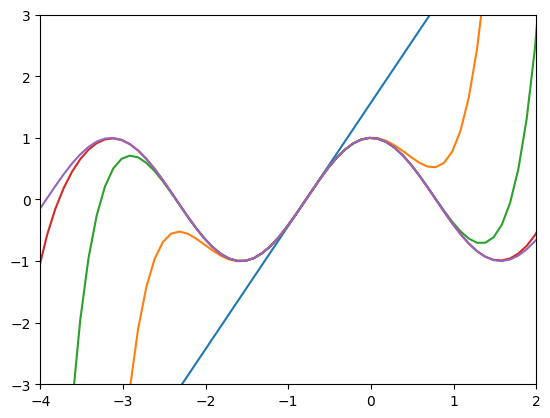

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import functools
from math import factorial

redux = functools.reduce

def taylor_sin(t, order):
    def in_sin(n):
        return np.power(-1, n) * np.power(t, 2 * n + 1) / factorial(2 * n + 1)
    return redux( lambda x,y: x + y, [ in_sin(step) for step in range(order) ] )

t = np.arange(-10 * np.pi, 10 * np.pi, 0.1)
x1 = taylor_sin(2 * t + np.pi / 2, 1)
x2 = taylor_sin(2 * t + np.pi / 2, 3)
x3 = taylor_sin(2 * t + np.pi / 2, 5)
x4 = taylor_sin(2 * t + np.pi / 2, 7)
x5 = taylor_sin(2 * t + np.pi / 2, 50)

plt.ylim(-3, 3)
plt.xlim(-4, 2)
plt.plot(t, x1)
plt.plot(t, x2)
plt.plot(t, x3)
plt.plot(t, x4)
plt.plot(t, x5)

plt.show()

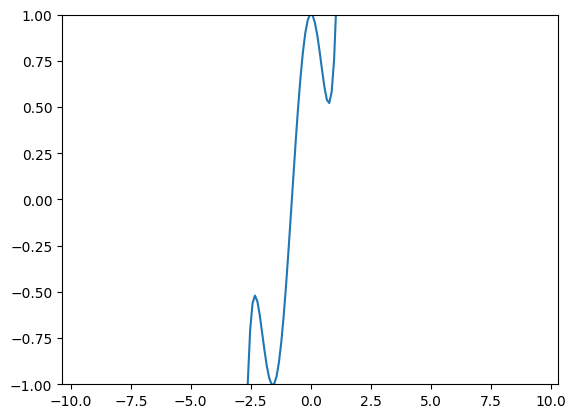

In [106]:
import sympy
from sympy import sin
from sympy.abc import x
import matplotlib.pyplot as plt

# creates a generator
taylor_series = sin(x).series(n=None)

# takes the number of terms desired for your generator
taylor_series = sum([next(taylor_series) for i in range(3)])

# creates a function that calculates the approximated sine function
mysin = sympy.lambdify((x,), taylor_series)

time = np.arange(-3*np.pi, 3 * np.pi, 0.1)
x = mysin(f(time))
plt.ylim(-1, 1)
plt.plot(time, x)
plt.show()

In [69]:
import numpy as np
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

srate = 48000

def midi_to_freq(midi_num = 69):
    freq = (2 ** ((midi_num - 69) / 12)) * 440
    
    return freq

def create_wavetable(freq, srate, waveform):
    wavetable_length = int(srate / freq)
    wavetable = np.zeros(wavetable_length)
    f = np.zeros(wavetable_length)
    p = np.zeros(wavetable_length)
    for i in np.arange(0,wavetable_length): 
        f[i] = freq
        if (i>0): 
            p[i] = (p[i-1]+f[i]/srate) % 1.0 
            
        if(waveform == "si"):
            wavetable[i] = np.sin(2 * np.pi * p[i])
        elif(waveform == "st"):
            wavetable[i] = signal.sawtooth(2 * np.pi * p[i])
        elif(waveform == "tr"):
            wavetable[i] = signal.sawtooth(2 * np.pi * p[i], 0.5)
        elif(waveform == "sq"):
            wavetable[i] = signal.square(2 * np.pi * p[i])
            
    return wavetable 


def play_wavetable(freq = 440.0, dur = 1.0, srate = 48000, 
                       amp=1.0, waveform = "si"):
    
    wavetable = create_wavetable(freq, srate, waveform)
    indices = np.arange(0, int(srate*dur))
    data = np.zeros(indices.shape)

    for i in indices: 
        wavetable_index = i % wavetable.shape[0] 
        data[i] = wavetable[wavetable_index] 
    return data 

def gatherNotes(note):

    if (note[0].rstrip() == 'r'):
        note[0] = 0
        
    if(len(note) == 3):
        temp = note[2][1:3]
        note[2] = temp
        wf = note[2]
    else:
        wf = "si"

    a = midi_to_freq(int(note[0]))
    b = float(note[1].rstrip())

    return play_wavetable(a, b, waveform = wf)

## Takes .essl files. Input pitches as MIDI values. Duration should be specified in seconds.
## Rests can be typed as 'r'. Enter as many notes as desired and add 'play' when done.
## Waveforms written as 'si,' 'st,' 'sq,' or 'tr.' If not specified, sine is default
## Voices (up to 4 in this build) can be listed above the set of note as 'voice#'

filename = input('Type in a file name ') 

while(filename.split('.')[1] != 'essl'):
    print('Incorrect file type. Should be \'*.essl\'\n')
    filename = input('Type in a file name ') 

voice = 1;
note_list = []
note_list2 = []
note_list3 = []
note_list4 = []

f = open(filename, 'r')    

while (True):
    line = f.readline()
    note = line.split(',')
    
    if (note[0] == '\n'):
        line = f.readline()
        note = line.split(',')

    if (note[0].rstrip() == 'play'):
        break
        
    if (note[0].rstrip() == 'voice1'):
        voice = 1
        line = f.readline()
        note = line.split(',')     
    if (note[0].rstrip() == 'voice2'):
        voice = 2
        line = f.readline()
        note = line.split(',')
    if (note[0].rstrip() == 'voice3'):
        voice = 3
        line = f.readline()
        note = line.split(',')
    if (note[0].rstrip() == 'voice4'):
        voice = 4
        line = f.readline()
        note = line.split(',')

    if (voice == 1):
        data_in = gatherNotes(note)
        note_list.append(data_in)
    if (voice == 2):
        data_in = gatherNotes(note)
        note_list2.append(data_in)
    if (voice == 3):
        data_in = gatherNotes(note)
        note_list3.append(data_in)
    if (voice == 4):
        data_in = gatherNotes(note)
        note_list4.append(data_in)

if (voice >= 1):
    data1 = np.hstack(note_list)
    outdata2 = data1
if (voice >= 2):
    data2 = np.hstack(note_list2)
    outdata = np.vstack([data1, data2])
    outdata2 = np.sum(outdata, axis=0)
if (voice >= 3):
    data3 = np.hstack(note_list3)
    outdata = np.vstack([data1, data2, data3])
    outdata2 = np.sum(outdata, axis=0)
if (voice >= 4):
    data4 = np.hstack(note_list4)
    outdata = np.vstack([data1, data2, data3, data4])
    outdata2 = np.sum(outdata, axis=0)

f.close()

ipd.Audio(outdata2, rate = srate)

Type in a file name poly.essl
